In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics #for confusion matrix
from sklearn.model_selection import train_test_split #for splitting data

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
#chi2 feature selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
scaler = MinMaxScaler()
features =['age','credit_score','balance','estimated_salary','active_member',]
X = df.drop(['churn','low_credit_score','vip_customer','is_Elderly','InactiveWithoutbalance','IsActiveWithoutbalance','IsActiveWithbalance'],axis=1)
y = df['churn']
X_scaled = scaler.fit_transform(X)
chi_scores = chi2(X_scaled,y)
chi2_scores = pd.Series(chi_scores[0], index=X.columns)
chi2_scores.sort_values(ascending=False, inplace=True)
print(chi2_scores)

country_Germany     225.464426
active_member       118.199414
age                 101.998366
country_France       54.923705
gender               51.539926
balance              28.502819
country_Spain        20.867206
products_number       4.863425
credit_score          0.522156
tenure                0.327054
estimated_salary      0.241805
credit_card           0.150041
dtype: float64


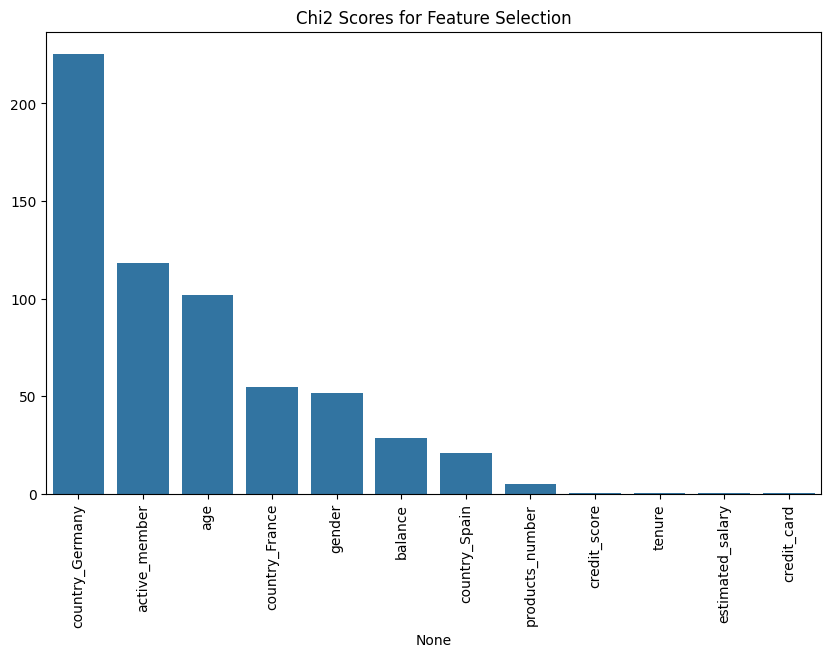

In [4]:
#plot chi2 scores
plt.figure(figsize=(10,6))
sns.barplot(x=chi2_scores.index, y=chi2_scores.values)
plt.xticks(rotation=90)
plt.title('Chi2 Scores for Feature Selection')
plt.show()

In [5]:
#important features based on chi2 scores
important_features = chi2_scores[chi2_scores > 4]
print(important_features)

country_Germany    225.464426
active_member      118.199414
age                101.998366
country_France      54.923705
gender              51.539926
balance             28.502819
country_Spain       20.867206
products_number      4.863425
dtype: float64


In [6]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y, random_state=42)
mutual_info_scores = pd.Series(mutual_info, index=X.columns)
mutual_info_scores.sort_values(ascending=False, inplace=True)
print(mutual_info_scores.head(13))

products_number     0.071319
age                 0.065381
country_Germany     0.020242
active_member       0.011984
balance             0.008400
gender              0.008183
credit_card         0.004614
country_France      0.004302
credit_score        0.002950
estimated_salary    0.002709
country_Spain       0.002330
tenure              0.000000
dtype: float64


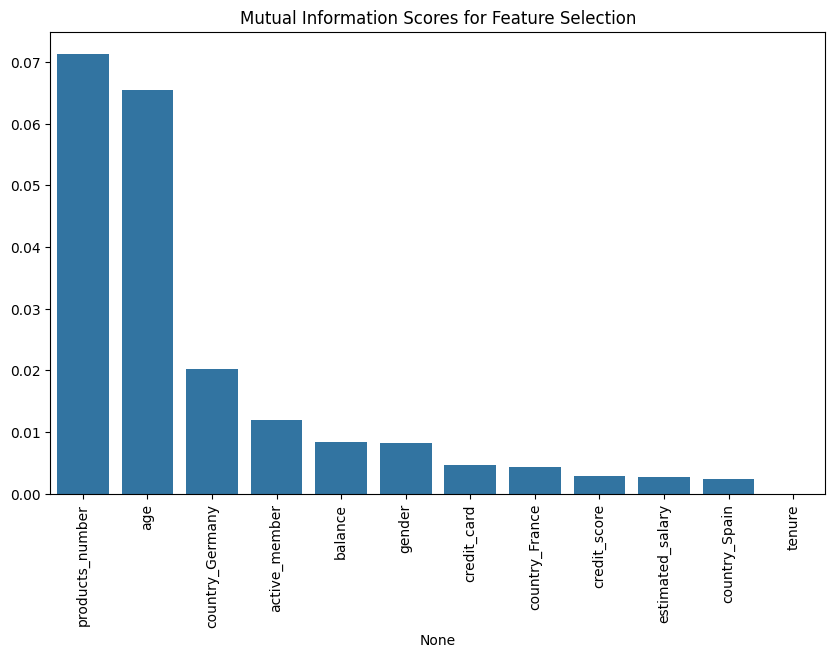

In [7]:
#plot feature importance based on mutual information
plt.figure(figsize=(10,6)) 
sns.barplot(x=mutual_info_scores.index, y=mutual_info_scores.values)
plt.xticks(rotation=90)
plt.title('Mutual Information Scores for Feature Selection')
plt.show()

In [8]:
#important features based on mutual information
important_features_mi = mutual_info_scores[mutual_info_scores > 0.001524]
print(important_features_mi)

products_number     0.071319
age                 0.065381
country_Germany     0.020242
active_member       0.011984
balance             0.008400
gender              0.008183
credit_card         0.004614
country_France      0.004302
credit_score        0.002950
estimated_salary    0.002709
country_Spain       0.002330
dtype: float64


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [10]:
#Desision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report

tree = DecisionTreeClassifier(random_state=42, max_depth=4, class_weight='balanced')
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1593
           1       0.41      0.74      0.53       407

    accuracy                           0.73      2000
   macro avg       0.66      0.74      0.67      2000
weighted avg       0.81      0.73      0.75      2000



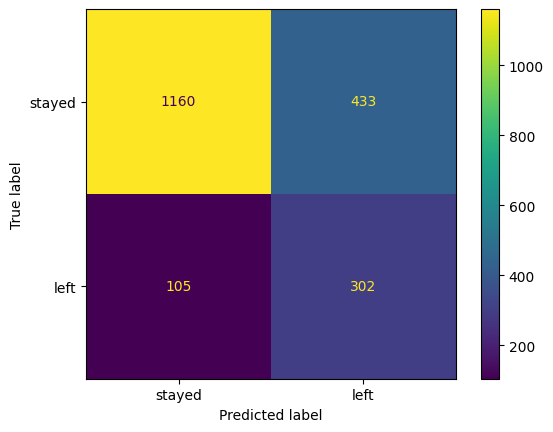

In [11]:
#confusion matrix
actual = y_test
predited = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()

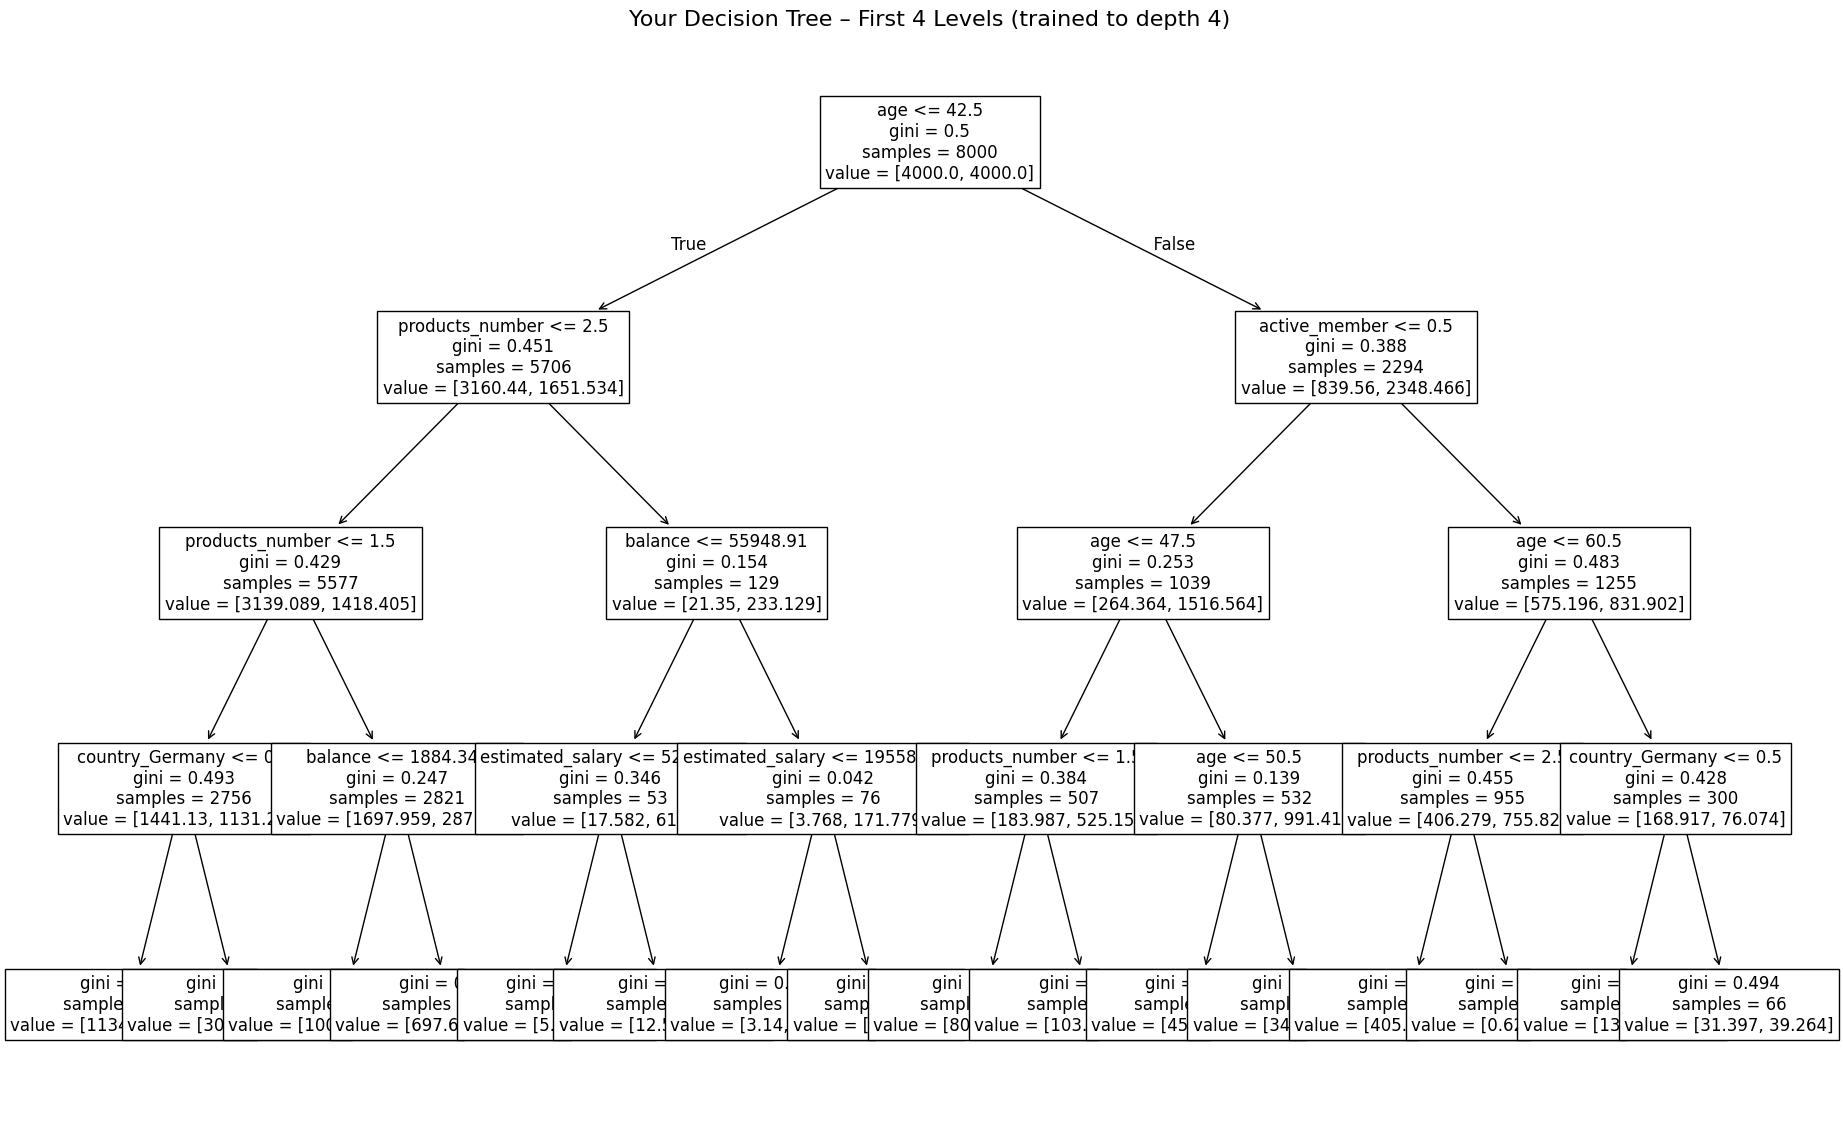

In [12]:
from sklearn.tree import plot_tree


plt.figure(figsize=(22, 14))
plot_tree(
    tree,
    fontsize=12,
    feature_names=X.columns,
    max_depth=4   # ← show only top 4 levels so it fits nicely
)
plt.title("Your Decision Tree – First 4 Levels (trained to depth 4)", fontsize=16)
plt.show()

In [13]:
#Naive Bayes classifier  (assume independency)
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)

y_pred = NB.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1593
           1       0.47      0.13      0.20       407

    accuracy                           0.79      2000
   macro avg       0.64      0.55      0.54      2000
weighted avg       0.74      0.79      0.74      2000



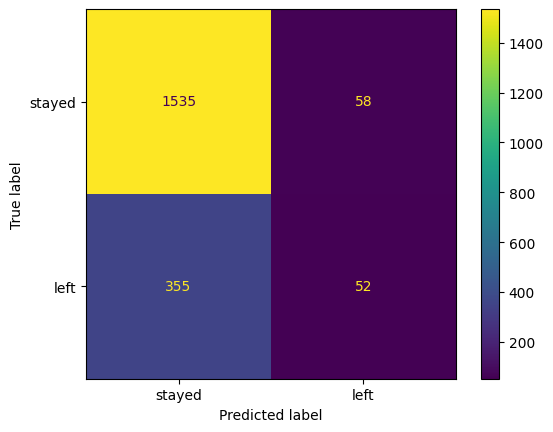

In [14]:
actual = y_test
predited = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Scale the data
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_ts_scaled = scaler.fit_transform(X_test)

# 2. Use better parameters
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,  # More iterations
    C=0.1,  # Different regularization
    solver='liblinear',
    random_state=42
)
lr.fit(X_tr_scaled,y_train)
y_pred=lr.predict(X_ts_scaled)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1593
           1       0.39      0.71      0.50       407

    accuracy                           0.72      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.72      0.74      2000



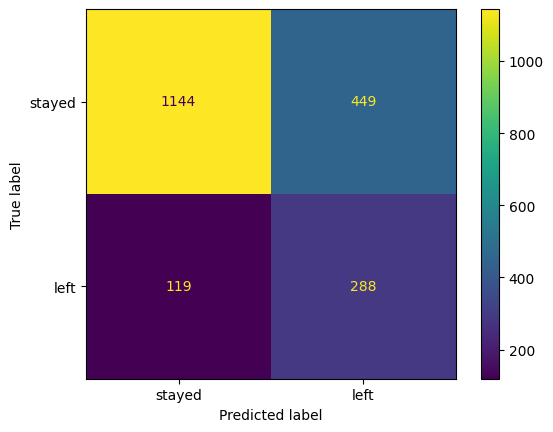

In [16]:
actual = y_test
predited = y_pred
confusion_mtx = metrics.confusion_matrix(actual, predited)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stayed','left'])
cm_display.plot()

In [17]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight='balanced',
    random_state=42
    )

rf.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.00      0.01      1593
           1       0.20      1.00      0.34       407

    accuracy                           0.21      2000
   macro avg       0.60      0.50      0.17      2000
weighted avg       0.84      0.21      0.07      2000



C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


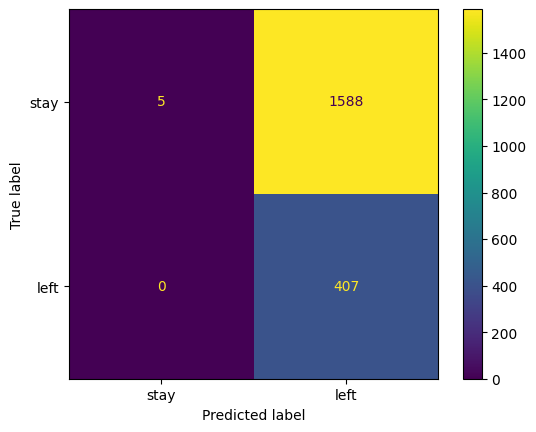

In [18]:
actual = y_test
predict = y_pred
confusion_mtx = metrics.confusion_matrix(actual,predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['stay','left'])
cm_display.plot()
plt.show()

In [19]:
#XGboost
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(
    scale_pos_weight=4,  
    random_state=42,
    n_estimators=100
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1593
           1       0.57      0.62      0.60       407

    accuracy                           0.83      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.83      0.83      0.83      2000



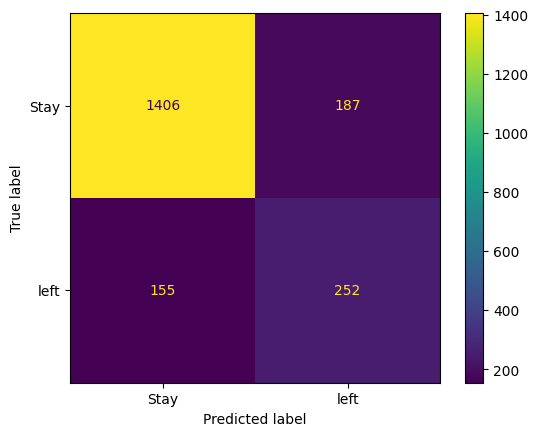

In [20]:
actual = y_test
predict = y_pred
confusion_mtx = metrics.confusion_matrix(actual,predict)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mtx,display_labels=['Stay','left'])
cm_display.plot()
plt.show()

In [23]:
import gradio as gr
import joblib
import numpy as np
joblib.dump(rf,"random_forest.joblib")

# Load your trained model
model = joblib.load("random_forest.joblib")  # Relative path

with gr.Blocks(title="Churn Prediction Dashboard") as demo:
    gr.Markdown("# 🏦 Customer Churn Prediction System")
    gr.Markdown("### Predict which customers are likely to leave")
    
    with gr.Row():
        with gr.Column(scale=1):
            gr.Markdown("### Customer Details")
            age = gr.Number(label="Age", value=35)
            credit_score = gr.Slider(label="Credit Score", minimum=300, maximum=850, value=650)
            gender = gr.Radio(label="Gender", choices=["Male", "Female"], value="Male")
            
        with gr.Column(scale=1):
            gr.Markdown("### Account Information")
            balance = gr.Number(label="Balance", value=10000)
            product_number = gr.Slider(label="Number of Products", minimum=1, maximum=4, value=1)
            tenure = gr.Slider(label="Tenure (years)", minimum=0, maximum=10, value=2)
    
    with gr.Row():
        estimated_salary = gr.Number(label="Estimated Salary", value=50000)
        active_member = gr.Radio(label="Active Member", choices=["Yes", "No"], value="Yes")
        country = gr.Dropdown(label="Country", choices=["France", "Germany", "Spain"], value="France")
        credit_card = gr.Radio(label="Has Credit Card", choices=["Yes", "No"], value="Yes")
    
    predict_btn = gr.Button("🔮 Predict Churn Risk", variant="primary")
    
    # Custom HTML output container
    output_html = gr.HTML(
        value="<div style='text-align: center; padding: 50px; color: #666;'>Results will appear here</div>"
    )
    
    def predict_and_display(age, credit_score, gender, estimated_salary, balance, 
                            product_number, tenure, active_member, country, credit_card):
        
        # === PREDICTION LOGIC ===
        # Convert categorical inputs to numerical
        gender_num = 1 if gender.lower() == 'male' else 0
        active_num = 1 if active_member.lower() == 'yes' else 0
        credit_card_num = 1 if credit_card.lower() == 'yes' else 0
        
        # Country encoding (one-hot)
        country_france = 1 if country == 'France' else 0
        country_germany = 1 if country == 'Germany' else 0
        country_spain = 1 if country == 'Spain' else 0
        
        # Create features array in EXACT order your model expects
        features = np.array([[
            credit_score,      # 1. credit_score
            gender_num,        # 2. gender
            age,               # 3. age
            tenure,            # 4. tenure
            balance,           # 5. balance
            product_number,    # 6. products_number
            credit_card_num,   # 7. credit_card
            active_num,        # 8. active_member
            estimated_salary,  # 9. estimated_salary
            country_france,    # 10. country_France
            country_germany,   # 11. country_Germany
            country_spain      # 12. country_Spain
        ]])
        
        # Make prediction
        prediction = model.predict(features)[0]
        probability = model.predict_proba(features)[0][1]
        
        # === HTML DISPLAY WITH CUSTOM COLORS ===
        if prediction == 1:
            # High risk - Red theme
            main_color = "#d32f2f"
            icon = "⚠️"
            title = "HIGH CHURN RISK"
            bg_color = "#ffebee"
            rec_bg_color = "#fff3e0"
            rec_border = "#ff9800"
            rec_text_color = "#e65100"
            rec_icon = "🔥"
            
            # High risk recommendations
            recommendations = '''
            <div style="background: white; padding: 15px; border-radius: 8px; border-left: 4px solid #f44336;">
                <div style="display: flex; align-items: center; margin-bottom: 8px;">
                    <span style="color: #f44336; margin-right: 8px;">🔔</span>
                    <strong style="color: #d32f2f;">Immediate Action Required</strong>
                </div>
                <div style="color: #555; font-size: 14px;">Call customer within 24 hours with retention specialist</div>
            </div>
            <div style="background: white; padding: 15px; border-radius: 8px; border-left: 4px solid #ff9800;">
                <div style="display: flex; align-items: center; margin-bottom: 8px;">
                    <span style="color: #ff9800; margin-right: 8px;">💰</span>
                    <strong style="color: #e65100;">Financial Incentive</strong>
                </div>
                <div style="color: #555; font-size: 14px;">Offer 40% discount on next purchase or service</div>
            </div>
            <div style="background: white; padding: 15px; border-radius: 8px; border-left: 4px solid #4caf50;">
                <div style="display: flex; align-items: center; margin-bottom: 8px;">
                    <span style="color: #4caf50; margin-right: 8px;">⭐</span>
                    <strong style="color: #388e3c;">Premium Upgrade</strong>
                </div>
                <div style="color: #555; font-size: 14px;">Free premium features for 3 months</div>
            </div>
            '''
            
        else:
            # Low risk - Green theme
            main_color = "#388e3c"
            icon = "✅"
            title = "LOW CHURN RISK"
            bg_color = "#e8f5e9"
            rec_bg_color = "#e3f2fd"
            rec_border = "#2196f3"
            rec_text_color = "#0d47a1"
            rec_icon = "📊"
            
            # Low risk recommendations
            recommendations = '''
            <div style="background: white; padding: 15px; border-radius: 8px; border-left: 4px solid #2196f3;">
                <div style="display: flex; align-items: center; margin-bottom: 8px;">
                    <span style="color: #2196f3; margin-right: 8px;">👁️</span>
                    <strong style="color: #0d47a1;">Standard Monitoring</strong>
                </div>
                <div style="color: #555; font-size: 14px;">Monitor account activity through standard channels</div>
            </div>
            <div style="background: white; padding: 15px; border-radius: 8px; border-left: 4px solid #673ab7;">
                <div style="display: flex; align-items: center; margin-bottom: 8px;">
                    <span style="color: #673ab7; margin-right: 8px;">🏆</span>
                    <strong style="color: #4527a0;">Loyalty Program</strong>
                </div>
                <div style="color: #555; font-size: 14px;">Include in loyalty program for retention</div>
            </div>
            <div style="background: white; padding: 15px; border-radius: 8px; border-left: 4px solid #009688;">
                <div style="display: flex; align-items: center; margin-bottom: 8px;">
                    <span style="color: #009688; margin-right: 8px;">📧</span>
                    <strong style="color: #00695c;">Communication</strong>
                </div>
                <div style="color: #555; font-size: 14px;">Send quarterly satisfaction survey and updates</div>
            </div>
            '''
        
        # Build the HTML response
        html_response = f"""
        <div style="padding: 25px; border-radius: 12px; background: {bg_color}; border: 3px solid {main_color}; color: #333;">
            <!-- HEADER -->
            <div style="display: flex; align-items: center; margin-bottom: 20px;">
                <span style="font-size: 42px; margin-right: 15px; color: {main_color};">{icon}</span>
                <div>
                    <h2 style="margin: 0; color: {main_color}; font-size: 28px;">{title}</h2>
                    <div style="color: #666; font-size: 14px; margin-top: 5px;">
                        Based on machine learning analysis of 12 customer features
                    </div>
                </div>
            </div>
            
            <!-- PREDICTION DETAILS -->
            <div style="background: white; padding: 20px; border-radius: 10px; margin: 20px 0; box-shadow: 0 3px 6px rgba(0,0,0,0.1);">
                <h3 style="margin-top: 0; color: #444; border-bottom: 2px solid {main_color}; padding-bottom: 8px;">📊 Prediction Details</h3>
                <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 20px; margin-top: 15px;">
                    <div style="text-align: center;">
                        <div style="font-size: 13px; color: #777; text-transform: uppercase; letter-spacing: 1px; margin-bottom: 5px;">Probability</div>
                        <div style="font-size: 48px; font-weight: bold; color: {main_color};">{probability:.1%}</div>
                        <div style="font-size: 12px; color: #999; margin-top: 5px;">Risk Score</div>
                    </div>
                    <div style="text-align: center;">
                        <div style="font-size: 13px; color: #777; text-transform: uppercase; letter-spacing: 1px; margin-bottom: 5px;">Prediction</div>
                        <div style="font-size: 32px; font-weight: bold; color: #333; padding: 10px; background: #f5f5f5; border-radius: 8px;">
                            {'WILL CHURN' if prediction==1 else 'WILL STAY'}
                        </div>
                    </div>
                </div>
            </div>
            
            <!-- RECOMMENDED ACTIONS -->
            <div style="background: {rec_bg_color}; padding: 20px; border-radius: 10px; border: 2px solid {rec_border}; margin: 20px 0; box-shadow: 0 3px 6px rgba(0,0,0,0.1);">
                <div style="display: flex; align-items: center; margin-bottom: 15px;">
                    <span style="font-size: 28px; margin-right: 10px; color: {rec_border};">{rec_icon}</span>
                    <h3 style="margin: 0; color: {rec_text_color};">🎯 Recommended Actions</h3>
                </div>
                
                <div style="display: grid; grid-template-columns: 1fr; gap: 12px;">
                    {recommendations}
                </div>
            </div>
            
            <!-- FOOTER NOTE -->
            <div style="margin-top: 20px; padding: 12px; background: rgba(255,255,255,0.8); border-radius: 8px; font-size: 12px; color: #666; text-align: center; border: 1px dashed #ccc;">
                <strong>Model Information:</strong> Random Forest classifier | {model.n_features_in_} features | Last updated: Today
            </div>
        </div>
        """
        
        return html_response
    
    predict_btn.click(
        fn=predict_and_display,
        inputs=[age, credit_score, gender, estimated_salary, balance, 
                product_number, tenure, active_member, country, credit_card],
        outputs=output_html
    )

# Launch the interface
demo.launch()

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Surface Laptop 3\AppData\Roaming\Python\Python313\site-packages\skl